<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/06_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pastas is a new and open source Python package for the analysis of hydrogeological time series. The objective of Pastas is twofold: to provide a scientific framework to develop and test new methods, and to provide a reliable ready-to-use software tool for groundwater practitioners. For technical details of the package, please refer to https://doi.org/10.1111/gwat.12925 and https://github.com/pastas/pastas. 

1. First we install pastas package

In [ ]:
pip install pastas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 8.8 MB/s 


2. Import the pastas and pandas

In [ ]:
import pastas as ps

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

3. Read the time series

In [ ]:
obs = pd.read_csv('/content/drive/MyDrive/Python_in_Hydrology/Data/pastas_data/example_1/obs.csv',parse_dates=['Date'], index_col='Date', squeeze=True)
rain = pd.read_csv('/content/drive/MyDrive/Python_in_Hydrology/Data/pastas_data/example_1/rain.csv', parse_dates=['Date'], index_col='Date', squeeze=True)
evap = pd.read_csv('/content/drive/MyDrive/Python_in_Hydrology/Data/pastas_data/example_1/evap.csv', parse_dates=['Date'], index_col='Date', squeeze=True)

4. Create a model object

In [ ]:
ml = ps.Model(obs)


INFO: Inferred frequency for time series obs: freq=MS
INFO:pastas.timeseries:Inferred frequency for time series obs: freq=MS


5. Add stress models

In [ ]:
rm = ps.RechargeModel(rain, evap, ps.Gamma, name='recharge')
ml.add_stressmodel(rm)

INFO: Inferred frequency for time series rain: freq=MS
INFO:pastas.timeseries:Inferred frequency for time series rain: freq=MS
INFO: Time series evap updated to dtype float.
INFO:pastas.timeseries:Time series evap updated to dtype float.
INFO: Inferred frequency for time series evap: freq=MS
INFO:pastas.timeseries:Inferred frequency for time series evap: freq=MS
ERROR: The name for the stressmodel you are trying to add already exists for this model. Select another name.
ERROR:pastas.model:The name for the stressmodel you are trying to add already exists for this model. Select another name.


6. Estimate model parameters

In [ ]:
ml.solve(tmax='1984')

Fit report obs                     Fit Statistics
nfev    19                     EVP          20.05
nobs    49                     R2            0.18
noise   True                   RMSE          1.98
tmin    1980-01-01 00:00:00    AIC          28.12
tmax    1984-01-01 00:00:00    BIC          37.58
freq    D                      Obj          35.46
warmup  3650 days 00:00:00     ___               
solver  LeastSquares           Interp.         No

Parameters (5 optimized)
                optimal   stderr    initial  vary
recharge_A     0.120212  ±56.94%   0.013957  True
recharge_n     5.508913  ±31.24%   1.000000  True
recharge_a    56.879521  ±44.50%  10.000000  True
constant_d    15.787555  ±41.00%   5.013542  True
noise_alpha  135.544881  ±36.26%  31.000000  True


In this example, tmax='1984' is used, meaning that the model is calibrated on the available head observations up to 1984.

7. Visualize model results

INFO: Time Series None were sampled up using bfill.
INFO:pastas.timeseries:Time Series None were sampled up using bfill.
INFO: Time Series None was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series None was extended to 1970-01-03 00:00:00 with the mean value of the time series.


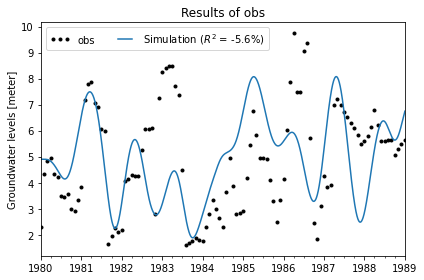

In [ ]:
ml.plot(tmax='1989')

8. Analyze residuals and noise

INFO: Time Series None were sampled up using bfill.
INFO:pastas.timeseries:Time Series None were sampled up using bfill.
INFO: Time Series None was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series None was extended to 1970-01-03 00:00:00 with the mean value of the time series.


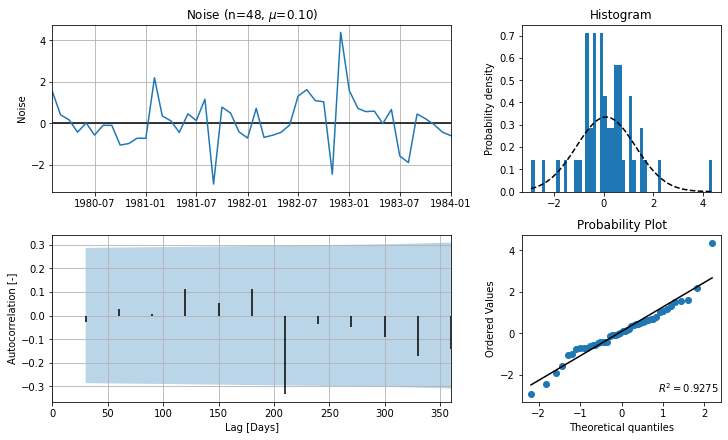

In [ ]:
ml.plots.diagnostics()